# Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix,roc_auc_score,balanced_accuracy_score,ConfusionMatrixDisplay,roc_curve,auc
from sklearn.preprocessing import label_binarize


In [2]:
#-- Cargar los datos---#
df=pd.read_csv('datos_miniproyecto1.csv',sep=';')
df = df.rename(columns={'Target': 'Estado'})
df = df.rename(columns= {'Curricular units 1st sem (grade)':'first_semester_grade'})
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Estado
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
print(df.columns.values)

['Marital status' 'Application mode' 'Application order' 'Course'
 'Daytime/evening attendance\t' 'Previous qualification'
 'Previous qualification (grade)' 'Nacionality' "Mother's qualification"
 "Father's qualification" "Mother's occupation" "Father's occupation"
 'Admission grade' 'Displaced' 'Educational special needs' 'Debtor'
 'Tuition fees up to date' 'Gender' 'Scholarship holder'
 'Age at enrollment' 'International' 'Curricular units 1st sem (credited)'
 'Curricular units 1st sem (enrolled)'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (approved)' 'first_semester_grade'
 'Curricular units 1st sem (without evaluations)'
 'Curricular units 2nd sem (credited)'
 'Curricular units 2nd sem (enrolled)'
 'Curricular units 2nd sem (evaluations)'
 'Curricular units 2nd sem (approved)' 'Curricular units 2nd sem (grade)'
 'Curricular units 2nd sem (without evaluations)' 'Unemployment rate'
 'Inflation rate' 'GDP' 'Estado']


In [4]:
print(df.shape)

(4424, 37)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
Cat_vars = df[['Marital status', 'Application mode',                                 
   'Application order', 'Course', 'Daytime/evening attendance\t',
    'Previous qualification',
    'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
    'Mother\'s occupation', 'Father\'s occupation','Displaced',                                       
   'Educational special needs',                       
  'Debtor' ,                                        
  'Tuition fees up to date'  ,                        
  'Gender'  ,                                          
  'Scholarship holder','International','Estado']] 
Cat_vars= Cat_vars.astype('category')                              

Num_vars = df[['Previous qualification (grade)','Admission grade','Age at enrollment','Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','first_semester_grade','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
            'Unemployment rate', 'Inflation rate', 'GDP']]


In [7]:
Num_vars.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),first_semester_grade,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
Cat_vars.describe(include='category')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Estado
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,0,Graduate
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


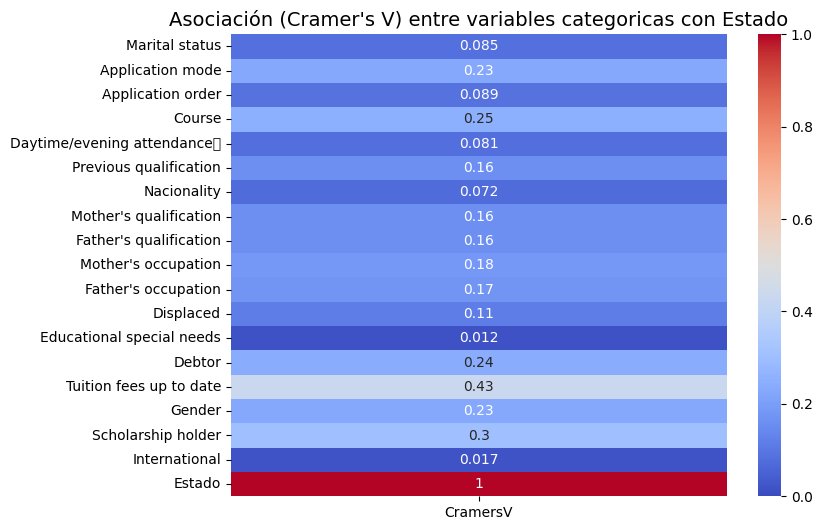

In [9]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# --- Calcular correlación con Estado ---
cramers_results = {}
for col in Cat_vars.columns:
    if col != 'Target':
        cramers_results[col] = cramers_v(Cat_vars['Estado'], Cat_vars[col])

# Convertir resultados a DataFrame
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['CramersV'])

# --- Graficar heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_df, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Asociación (Cramer's V) entre variables categoricas con Estado", fontsize=14)
plt.show()


El análisis de asociación mediante la V de Cramer destaca que los factores de índole económica y académica son los más relevantes. La variable "Tuition fees up to date" (Matrículas al día) presenta la asociación más fuerte con el "Estado" (V=0.43), seguida por "Scholarship holder" (Becario) (V=0.30) y "Course" (Curso) (V=0.25). En contraste, variables como "Educational special needs" (Necesidades educativas especiales) (V=0.012) e "International" (Internacional) (V=0.017) muestran una asociación casi nula, sugiriendo una escasa relevancia predictiva.

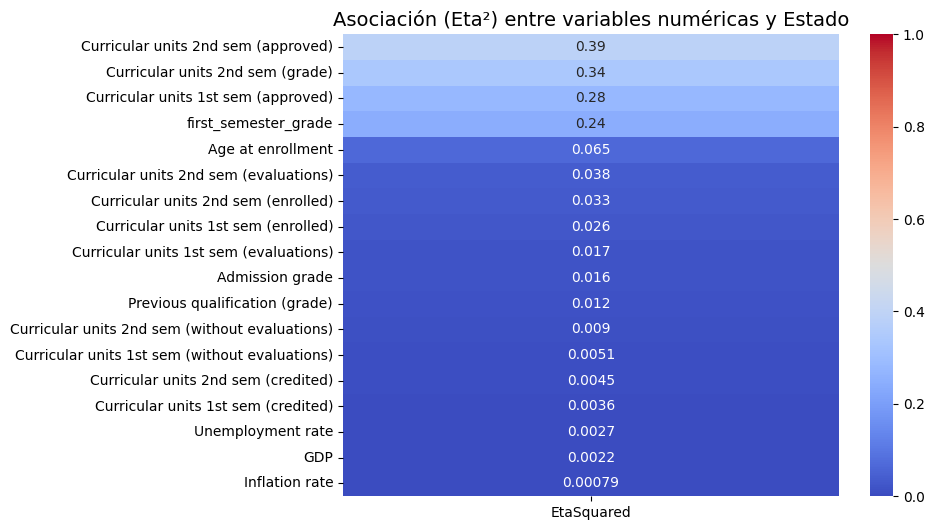

In [10]:
def eta_squared(x, y):
    # y = categórica, x = numérica
    data = pd.DataFrame({ 'x': x, 'y': y })
    model = smf.ols('x ~ C(y)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    eta_sq = anova_table['sum_sq']['C(y)'] / sum(anova_table['sum_sq'])
    return eta_sq

# Calcular eta² para todas las variables numéricas con respecto a Estado
eta_results = {}
for col in Num_vars.columns:
    if col != 'Estado':
        eta_results[col] = eta_squared(Num_vars[col], df['Estado'])

eta_df = pd.DataFrame.from_dict(eta_results, orient='index', columns=['EtaSquared'])
eta_df = eta_df.sort_values(by='EtaSquared', ascending=False)
plt.figure(figsize=(8,6))
sns.heatmap(eta_df, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Asociación (Eta²) entre variables numéricas y Estado", fontsize=14)
plt.show()

El análisis de asociación (Eta²) para las variables numéricas indica que el rendimiento académico del estudiante es el factor predictivo predominante para la variable "Estado". Las variables con mayor poder explicativo son las "unidades curriculares aprobadas del 2º semestre" (η²=0.39) y la "nota del 2º semestre" (η²=0.34). En contraste, los indicadores macroeconómicos como la "tasa de inflación" (η²=0.00079) y el "PIB" (η²=0.0022) tienen una asociación prácticamente nula, lo que demuestra que el desempeño individual del estudiante es mucho más relevante que el contexto económico general.

                         Association  EtaSquared
Tuition fees up to date     0.431458         NaN
Scholarship holder          0.304407         NaN
Course                      0.251192         NaN
Debtor                      0.242115         NaN
Gender                      0.229625         NaN
Application mode            0.229620         NaN
Mother's occupation         0.181640         NaN
Father's occupation         0.172898         NaN
Father's qualification      0.159466         NaN
Previous qualification      0.157570         NaN


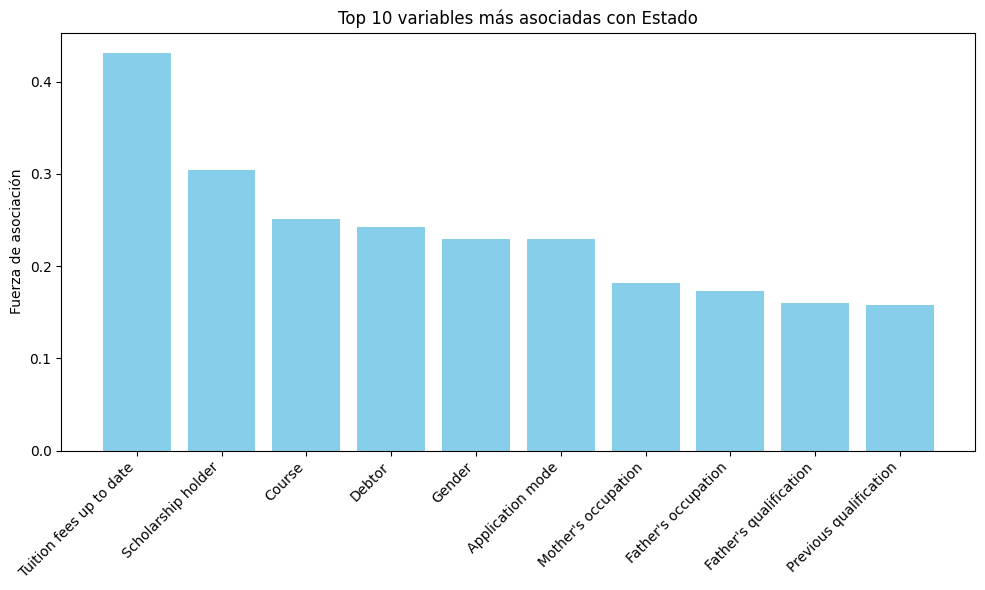

In [11]:
cramers_df = cramers_df.rename(columns={'CramersV': 'Association'})
eta_df = eta_df.rename(columns={'Eta2': 'Association'})

# Combinar ambas en una sola
combined_df = pd.concat([cramers_df, eta_df])
combined_df = combined_df.drop(index='Estado', errors='ignore')


# Ordenar por la fuerza de asociación
top_10 = combined_df.sort_values(by='Association', ascending=False).head(10)
print(top_10)
# Graficar

plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10['Association'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fuerza de asociación')
plt.title('Top 10 variables más asociadas con Estado')
plt.tight_layout()
plt.show()

El análisis de correlación revela que el estado de la matrícula ("Tuition fees up to date") es la variable con la asociación más fuerte con el estado del estudiante, mostrando un coeficiente de aproximadamente 0.43. A esta le sigue la condición de becado ("Scholarship holder") con una fuerza de asociación de alrededor de 0.3. Otras variables relevantes, aunque con menor impacto, incluyen el curso, la condición de deudor, el género y el modo de aplicación. Es notable que las ocupaciones y cualificaciones de los padres se encuentran entre las variables con menor grado de asociación dentro de este grupo de las 10 principales. Estos hallazgos sugieren que los factores económicos y académicos inmediatos del estudiante son los predictores más significativos de su estado.

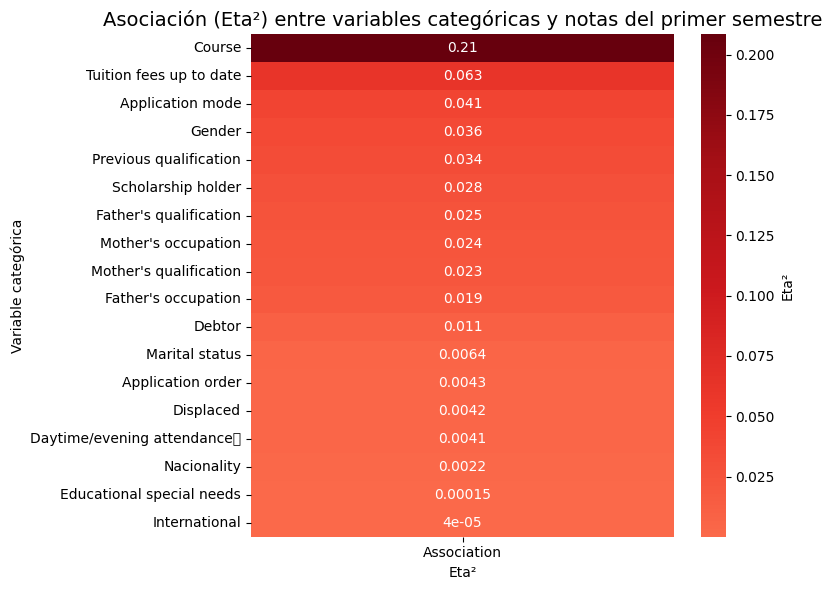

In [12]:
# ---------- 1. Eta² para categóricas vs nota primer semestre ----------
def eta_squared_num_cat(cat, num):
    groups = [num[cat == level] for level in cat.unique()]
    f_val, p_val = f_oneway(*groups)
    ss_between = sum(len(g) * (g.mean() - num.mean())**2 for g in groups)
    ss_total = sum((num - num.mean())**2)
    eta2 = ss_between / ss_total
    return eta2

eta_results = {}
for col in Cat_vars.columns:
    eta_results[col] = eta_squared_num_cat(Cat_vars[col], Num_vars['first_semester_grade'])

eta_df = pd.DataFrame.from_dict(eta_results, orient='index', columns=['Association'])

# 🔹 Eliminar "Estado" y variables duplicadas con Num_vars
eta_df = eta_df.drop(index="Estado", errors="ignore")
eta_df = eta_df[~eta_df.index.isin(Num_vars.columns)]

# Ordenar
eta_df = eta_df.sort_values(by='Association', ascending=False)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(eta_df, annot=True, cmap='Reds', center=0, cbar_kws={'label': 'Eta²'})
plt.title("Asociación (Eta²) entre variables categóricas y notas del primer semestre", fontsize=14)
plt.ylabel("Variable categórica")
plt.xlabel("Eta²")
plt.tight_layout()
plt.show()


El análisis muestra que la carrera elegida ("Course") es el factor más determinante en las notas del primer semestre (η² = 0.21). El resto de variables, incluyendo el estado de la matrícula y factores socioeconómicos, tienen una influencia considerablemente menor, siendo en su mayoría mínima o casi nula.

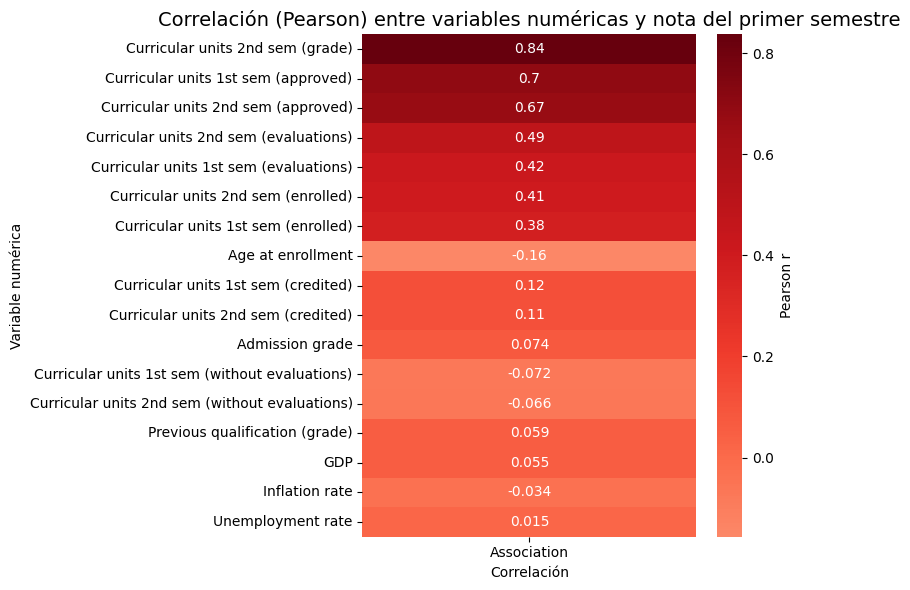

In [13]:
# ---------- 2. Pearson para numéricas vs nota primer semestre ----------
pearson_results = Num_vars.corr()['first_semester_grade'].drop('first_semester_grade').to_frame(name='Association')
pearson_results = pearson_results.reindex(pearson_results['Association'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,6))
sns.heatmap(pearson_results, annot=True, cmap='Reds', center=0, cbar_kws={'label': 'Pearson r'})
plt.title("Correlación (Pearson) entre variables numéricas y nota del primer semestre", fontsize=14)
plt.ylabel("Variable numérica")
plt.xlabel("Correlación")
plt.tight_layout()
plt.show()

El análisis de correlación de Pearson revela que el rendimiento académico del estudiante es, por lejos, el predictor más fuerte de las notas del primer semestre. Específicamente, las calificaciones obtenidas en el segundo semestre muestran una correlación positiva casi perfecta (r = 0.84). En marcado contraste, factores externos como la nota de admisión y los indicadores macroeconómicos (PIB, inflación) no presentan una correlación significativa, lo que sugiere que el rendimiento previo y continuo del estudiante es el factor clave.

                                        Association
Curricular units 2nd sem (grade)           0.837170
Curricular units 1st sem (approved)        0.696113
Curricular units 2nd sem (approved)        0.673335
Curricular units 2nd sem (evaluations)     0.487236
Curricular units 1st sem (evaluations)     0.418038
Curricular units 2nd sem (enrolled)        0.406167
Curricular units 1st sem (enrolled)        0.376996
Course                                     0.208376
Age at enrollment                         -0.156616
Curricular units 1st sem (credited)        0.122978


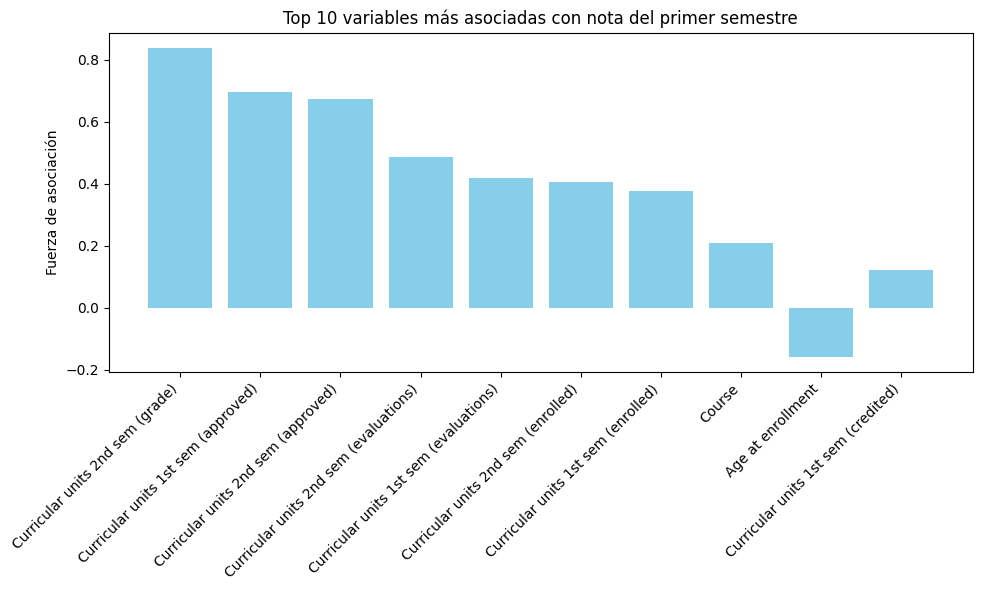

In [14]:
# ---------- 3. Unir resultados ----------
combined = pd.concat([eta_df, pearson_results])

# ---------- 4. Top 10 ----------
top10 = combined.reindex(combined['Association'].abs().sort_values(ascending=False).index).head(10)
print(top10)

# ---------- 5. Graficar ----------
plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10['Association'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fuerza de asociación')
plt.title('Top 10 variables más asociadas con nota del primer semestre')
plt.tight_layout()
plt.show()

El análisis confirma que el factor más determinante para la nota del primer semestre es el propio rendimiento académico del estudiante. Las calificaciones del segundo semestre y las unidades curriculares aprobadas tanto en el primer como en el segundo semestre son las variables con la asociación más fuerte. Esto subraya que el desempeño académico previo y concurrente es el mejor predictor de los resultados del estudiante.

# EDA

Por efectos de tiempo y practicos escogeremos las 5 variables con mayor asociación a las variables 'Estado' y 'first_semester_grade', para la realización del EDA es decir:
- Estado: 'Tuitions to feed up', 'Scholarship holder, 'Course', 'Debtor', 'Gender'.
- first_semester_grade: 'Curricular units 2nd sem (grade)','Curricular units 1st sem(approved)', 'Curricular units 2nd sem(approved)', 'Curricular units 1st sem (Evaluations)', 'Curricular units 2nd sem (Enrolled).

## Variables respuesta

Para el proyecto nuestras variables respuesta o "Target" serán __Estado__ y __Las notas del primer semestre__

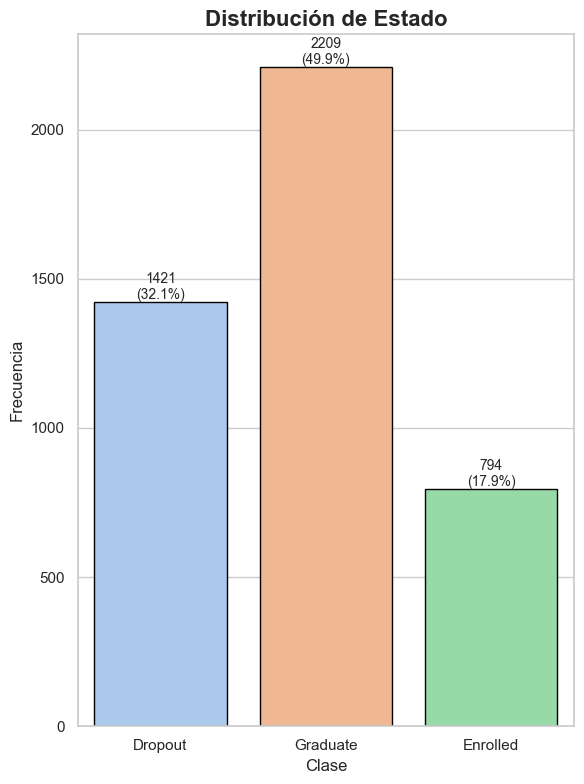

In [15]:
sns.set(style="whitegrid", palette="pastel", font_scale=1)

plt.figure(figsize=(6, 8))
ax = sns.countplot(data=df, x='Estado', hue='Estado', legend=False,
                   palette='pastel', edgecolor='black')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}\n({height/len(df)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
plt.title('Distribución de Estado', fontsize=16, weight='bold')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Con este grafico podemos apreciar la distribución de clases de nuestra variable __Estado__, la cual presenta un gran desbalance.
Mientras que la clase **Graduate** representa casi un 50% de los datos, la variable **Enrolled** apenas alcance un 18% con 794 registros.
Y aunque la clase **Dropout** tiene más de 1200 registros apenas cubre un 30% de los datos.

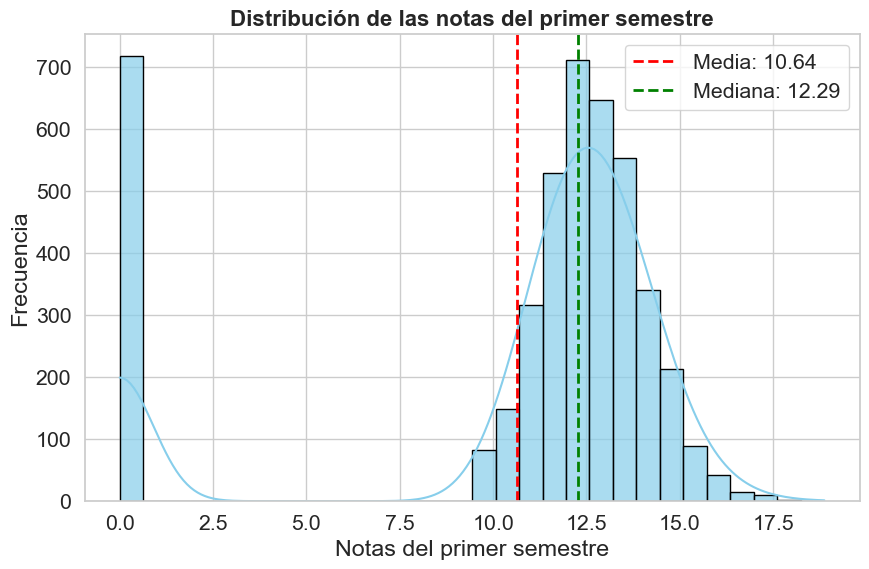

In [16]:
sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize=(9, 6))

# histograma + densidad
ax = sns.histplot(data=df, x='first_semester_grade', bins=30, kde=True,
                  color='skyblue', edgecolor='black', alpha=0.7)
# título y ejes
plt.title(f'Distribución de las notas del primer semestre', fontsize=16, weight='bold')
plt.xlabel('Notas del primer semestre')
plt.ylabel('Frecuencia')
# estadísticas clave en el gráfico
mean_val = df['first_semester_grade'].mean()
median_val = df['first_semester_grade'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

El histograma revela una distribución marcadamente bimodal. Se observa una concentración anómala de notas en cero. El resto de las calificaciones se agrupa de forma casi normal, con una mediana de 12.29, que es una medida más representativa del rendimiento del estudiante típico que la media (10.64), la cual se ve fuertemente sesgada a la baja por los valores nulos.

## Variables asociadas con el Estado

### Matrículas actualizadas

'Tuition fees up to date'

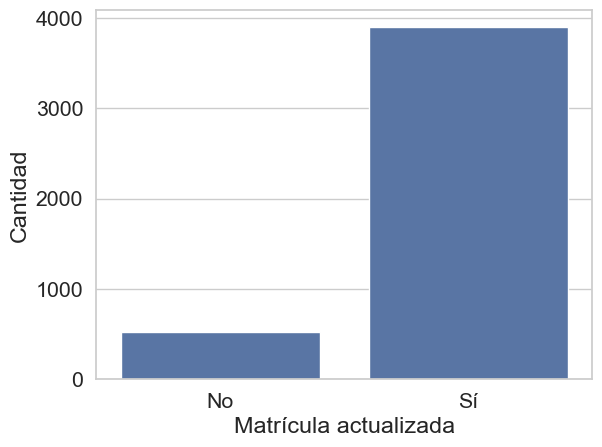

In [17]:
sns.countplot(x = 'Tuition fees up to date', data = df)
plt.xlabel('Matrícula actualizada')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambia 0 y 1 por No y Sí
plt.show()

El gráfico ilustra un fuerte desbalance en la variable "Matrícula actualizada". Se observa que una abrumadora mayoría de los estudiantes (cerca de 4,000) sí cuenta con una matrícula vigente, mientras que una pequeña fracción (alrededor de 500) no

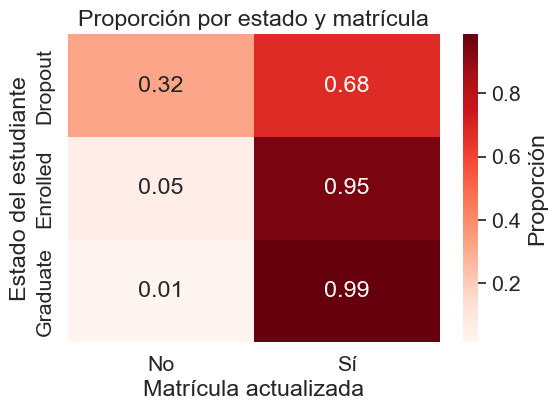

In [18]:
contingencia = pd.crosstab(df['Estado'], df['Tuition fees up to date'], normalize='index')
plt.figure(figsize=(6, 4))
sns.heatmap(contingencia, annot=True, cmap='Reds', fmt=".2f", cbar_kws={'label': 'Proporción'})
plt.xlabel('Matrícula actualizada')
plt.ylabel('Estado del estudiante')
plt.title('Proporción por estado y matrícula')
plt.xticks([0.5, 1.5], ['No', 'Sí'], ha='center', rotation=0)
plt.show()


Se revela una fuerte relación entre el estado del estudiante y si su matrícula está actualizada. La falta de matrícula ("No") es un indicador clave de deserción: mientras que es una condición rara en estudiantes inscritos (5%) y graduados (1%), representa al 32% del grupo de desertores ("Dropout").

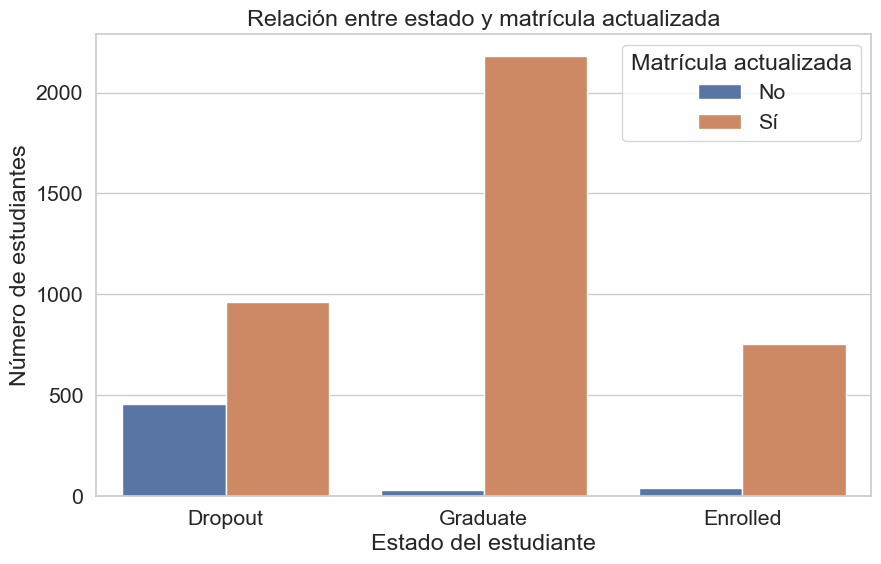

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Estado', hue='Tuition fees up to date', data=df)
plt.xlabel('Estado del estudiante')
plt.ylabel('Número de estudiantes')
plt.title('Relación entre estado y matrícula actualizada')
plt.legend(title='Matrícula actualizada', labels=['No', 'Sí'])
plt.show()

Se observa de manera contundente que el grupo de desertores ("Dropout") aglutina la gran mayoría de los estudiantes con matrícula no actualizada. Para los estudiantes graduados y los actualmente inscritos, no tener la matrícula al día es una situación prácticamente inexistente, lo que subraya la fuerte capacidad de esta variable para señalar un riesgo de abandono.

### Becario
'Scholarship holder'

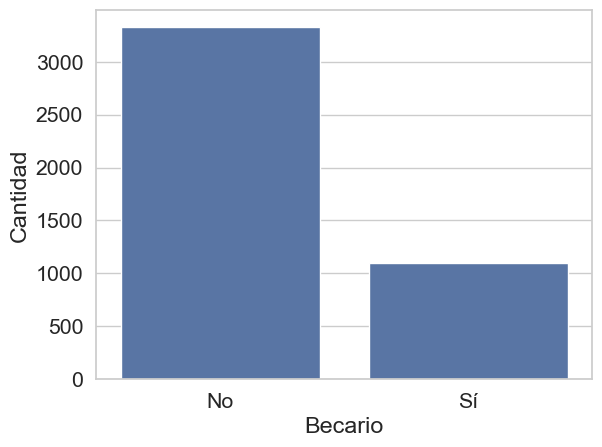

In [20]:
sns.countplot(x = 'Scholarship holder', data = df)
plt.xlabel('Becario')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])  
plt.show()

Con más de 3,000 estudiantes sin beca frente a poco más de 1,000 que sí la tienen. Esta distribución indica que, si bien la ayuda económica está presente, no es la condición predominante en esta población estudiantil.

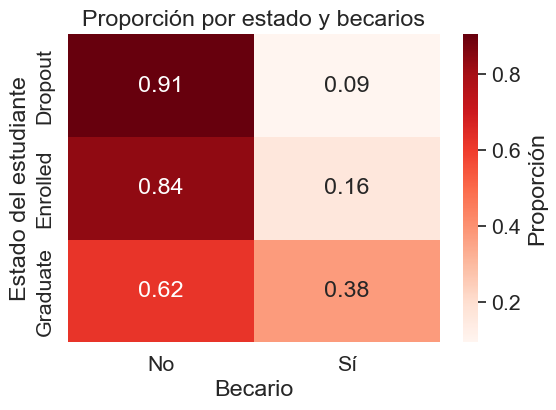

In [21]:
contingencia = pd.crosstab(df['Estado'], df['Scholarship holder'], normalize='index')
plt.figure(figsize=(6, 4))
sns.heatmap(contingencia, annot=True, cmap='Reds', fmt=".2f", cbar_kws={'label': 'Proporción'})
plt.xlabel('Becario')
plt.ylabel('Estado del estudiante')
plt.title('Proporción por estado y becarios')
plt.xticks([0.5, 1.5], ['No', 'Sí'], ha='center', rotation=0)
plt.show()

Notablemente, la proporción de becarios es más alta entre los graduados (38%) y disminuye significativamente para los estudiantes que desertan, donde solo el 9% contaba con beca. Esto sugiere que la condición de becario está positivamente asociada con la persistencia y la culminación de los estudios.

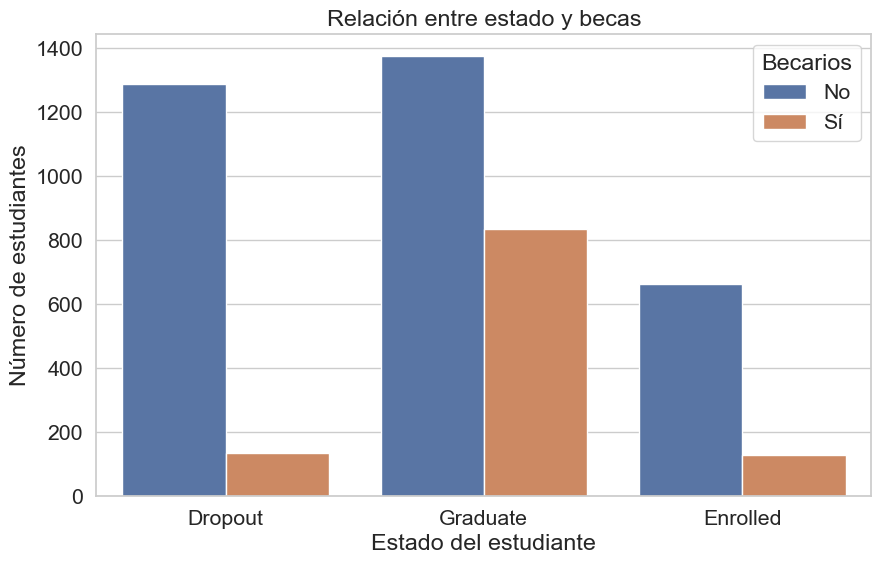

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Estado', hue='Scholarship holder', data=df)
plt.xlabel('Estado del estudiante')
plt.ylabel('Número de estudiantes')
plt.title('Relación entre estado y becas')
plt.legend(title='Becarios', labels=['No', 'Sí'])
plt.show()

Se confirma el patrón observado anteriormente: el número absoluto de estudiantes no becados es mayor en todas las categorías, pero la diferencia es abrumadora en el grupo de desertores ("Dropout"). Por el contrario, el grupo de graduados ("Graduate") concentra, con diferencia, el mayor número de estudiantes becarios, lo que refuerza la fuerte asociación positiva entre tener una beca y la probabilidad de completar los estudios exitosamente.

### Curso
'Course'

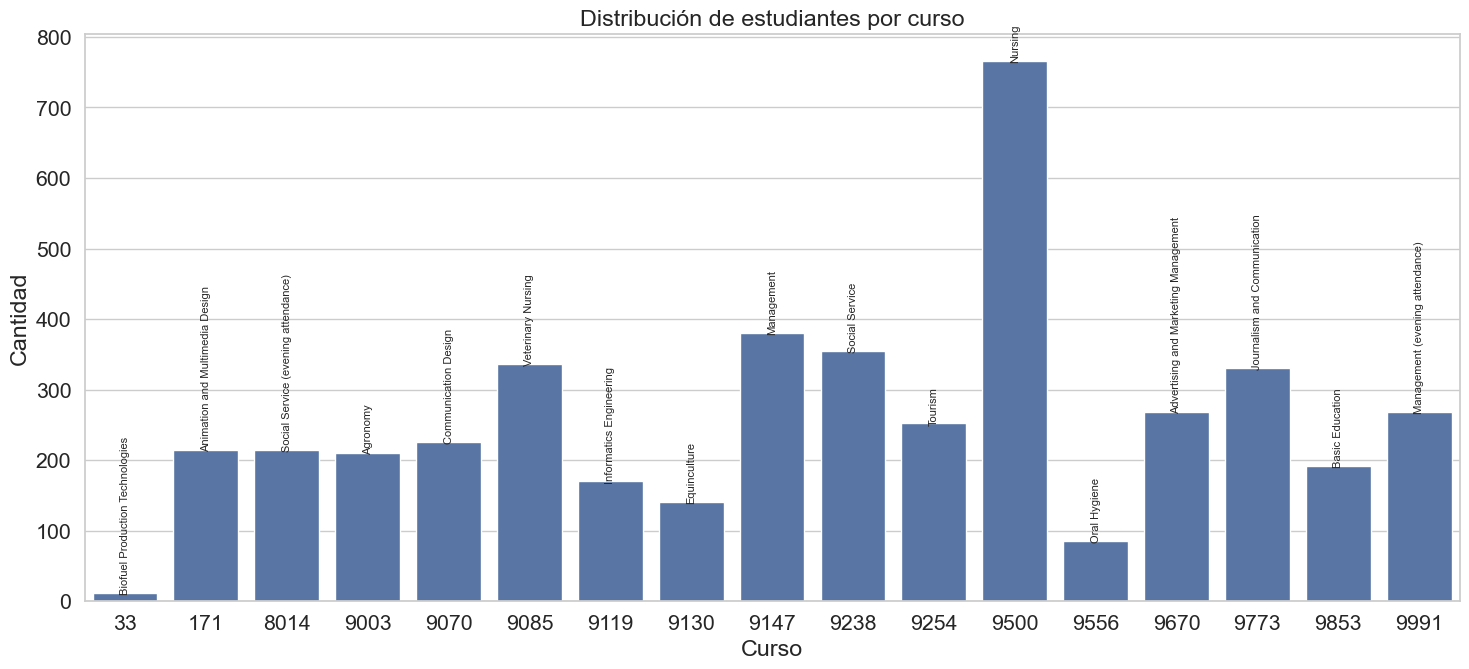

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de código a nombre
course_names = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

plt.figure(figsize=(15, 7))
ax = sns.countplot(x='Course', data=df)

plt.xlabel('Curso')
plt.ylabel('Cantidad')
plt.title('Distribución de estudiantes por curso')

# Colocar nombre encima de cada barra
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    code = int(p.get_x() + 0.5)  # No usar así, mejor sacar directamente el valor x-tick
    # Mejor: sacamos el valor del tick (código) desde los xticks y usamos el índice
# Mejor método:
    
# Obtener las posiciones y etiquetas actuales de las barras (códigos)
ticks = ax.get_xticks()
labels = [int(t.get_text()) for t in ax.get_xticklabels()]

# Como en countplot el orden de barras es el orden de aparición, podemos usar:
for i, p in enumerate(ax.patches):
    height = p.get_height()
    code = int(ax.get_xticklabels()[i].get_text())
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, course_names.get(code, str(code)), 
            ha='center', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()



El gráfico revela una marcada disparidad en la distribución de estudiantess entre los distintos programas académicos. El curso de Enfermería (código 9500) destaca de forma abrumadora, concentrando la mayor cantidad de estudiantes, superando los 700. Otros programas como Gestión (9147), Servicio Social (9238) y Enfermería Veterinaria (9085) también presentan un número significativo de estudiante, pero en una escala mucho menor.

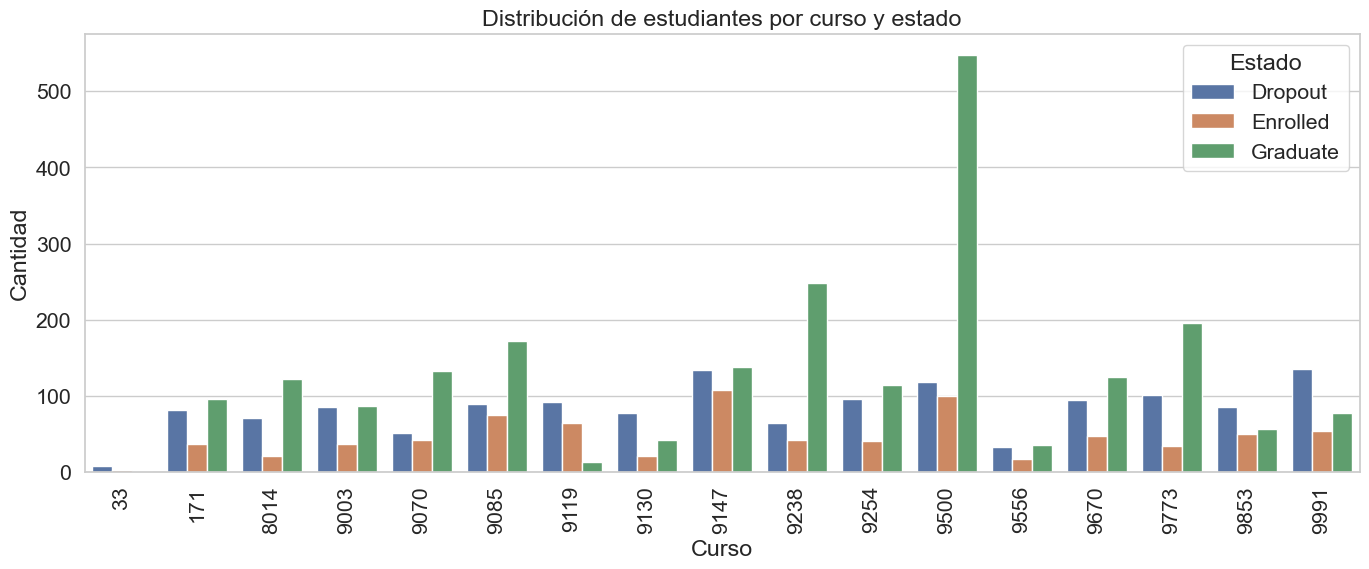

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x='Course', hue='Estado', data=df)
plt.xticks(rotation=90)
plt.xlabel('Curso')
plt.ylabel('Cantidad')
plt.title('Distribución de estudiantes por curso y estado')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()


 La carrera de Enfermería (9500) no solo tiene la mayor población estudiantil, sino que también produce, por un margen muy amplio, el mayor número de graduados.
Si bien la tasa de graduación es alta en los cursos populares, estos también concentran el mayor número absoluto de desertores. Programas como Gestión (9147), Enfermería (9500) y Gestión Nocturna (9991) muestran cifras de abandono significativas. 
Esti indic que, si bien los cursos con mayor matrícula son los que más graduados aportan, también son los que presentan los mayores desafíos en términos de retención. 

### Deudor
'Debtor'

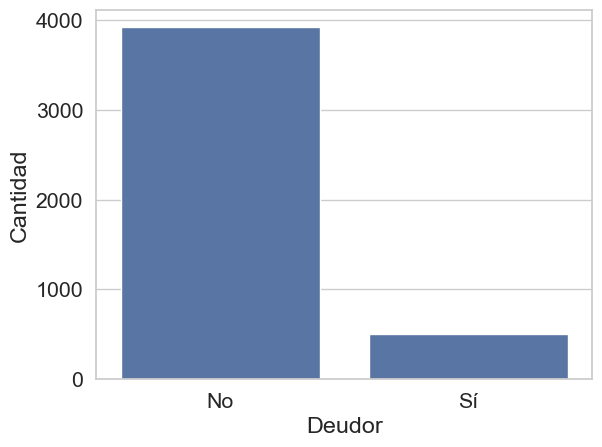

In [25]:
sns.countplot(x = 'Debtor', data = df)
plt.xlabel('Deudor')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])  # Cambia 0 y 1 por No y Sí
plt.show()

Se observa un fuerte desbalance, con casi 4,000 estudiantes que no son deudores frente a un grupo considerablemente menor, de alrededor de 500, que sí lo son. Este desequilibrio define a la condición de "Deudor" como una clase minoritaria dentro del conjunto de datos.

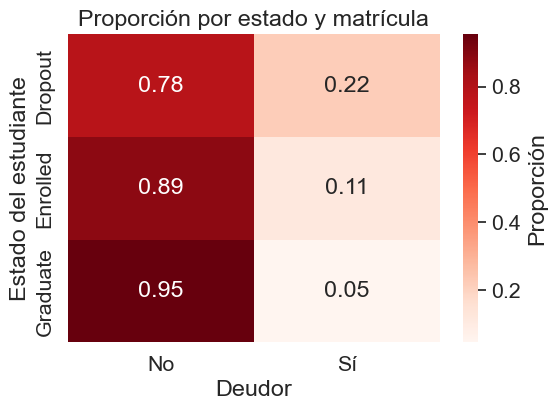

In [26]:
contingencia = pd.crosstab(df['Estado'], df['Debtor'], normalize='index')
plt.figure(figsize=(6, 4))
sns.heatmap(contingencia, annot=True, cmap='Reds', fmt=".2f", cbar_kws={'label': 'Proporción'})
plt.xlabel('Deudor')
plt.ylabel('Estado del estudiante')
plt.title('Proporción por estado y matrícula')
plt.xticks([0.5, 1.5], ['No', 'Sí'], ha='center', rotation=0)
plt.show()


La condición de deudor es notablemente más frecuente entre los estudiantes que han desertado ("Dropout"), alcanzando al 22% de este grupo. Esta proporción disminuye para los estudiantes actualmente inscritos (11%) y es mínima entre los graduados (5%). Estos datos sugieren que las dificultades económicas, manifestadas como deuda, son un factor de riesgo fuertemente asociado a la deserción estudiantil.

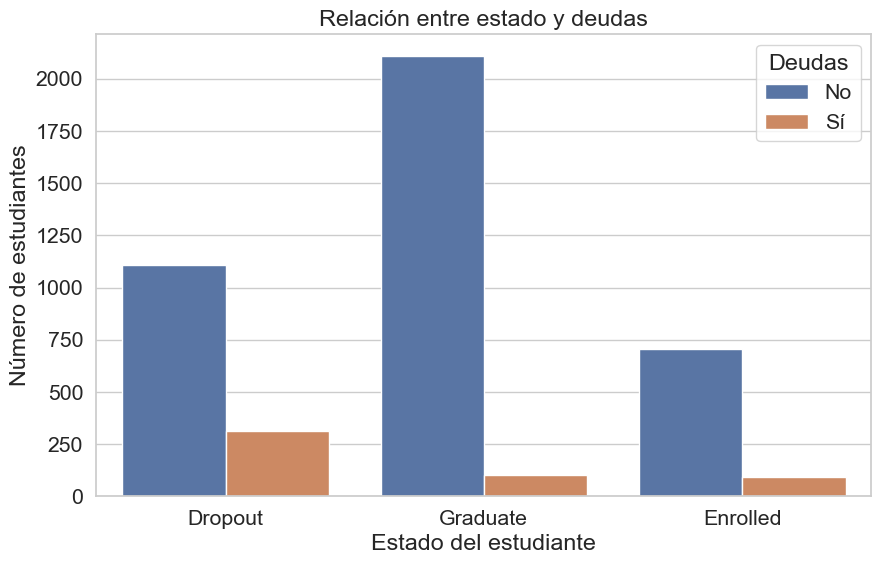

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Estado', hue='Debtor', data=df)
plt.xlabel('Estado del estudiante')
plt.ylabel('Número de estudiantes')
plt.title('Relación entre estado y deudas')
plt.legend(title='Deudas', labels=['No', 'Sí'])
plt.show()

El hallazgo más significativo es que el grupo de desertores ("Dropout") concentra, por un amplio margen, el mayor número absoluto de estudiantes con deudas. En contraste, la deuda es una condición mínima entre los graduados. Esta visualización subraya que la carga de la deuda es una característica predominante en la población que abandona sus estudios, consolidando su valor como un potente indicador de riesgo.

### Género
'Gender'

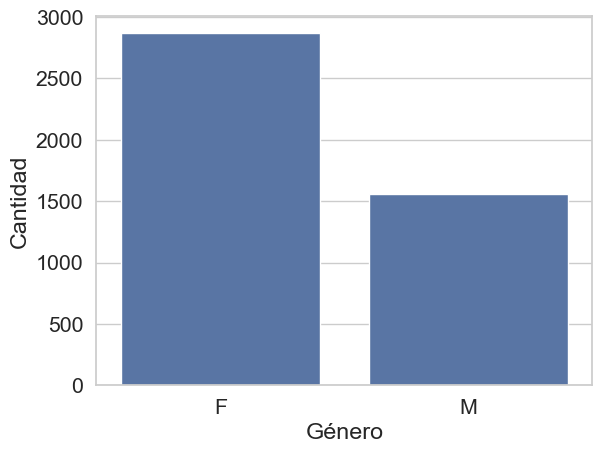

In [28]:
sns.countplot(x = 'Gender', data = df)
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['F', 'M'])  # Cambia 0 y 1 por No y Sí
plt.show()

 Existe una predominancia significativa de estudiantes de género femenino (cerca de 2,900) sobre el masculino (aproximadamente 1,500).

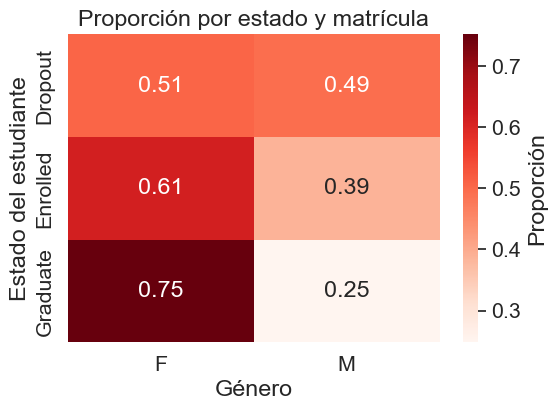

In [29]:
contingencia = pd.crosstab(df['Estado'], df['Gender'], normalize='index')
plt.figure(figsize=(6, 4))
sns.heatmap(contingencia, annot=True, cmap='Reds', fmt=".2f", cbar_kws={'label': 'Proporción'})
plt.xlabel('Género')
plt.ylabel('Estado del estudiante')
plt.title('Proporción por estado y matrícula')
plt.xticks([0.5, 1.5], ['F', 'M'], ha='center', rotation=0)
plt.show()


Se observa una marcada diferencia en el grupo de graduados, donde las estudiantes de género femenino representan el 75% del total, una proporción significativamente mayor que la de sus contrapartes masculinos (25%). En contraste, la distribución de género entre los desertores ("Dropout") es prácticamente equitativa. Este hallazgo indica que las mujeres, en este conjunto de datos, no solo son la mayoría en la población estudiantil, sino que también se gradúan en una proporción considerablemente mayor.

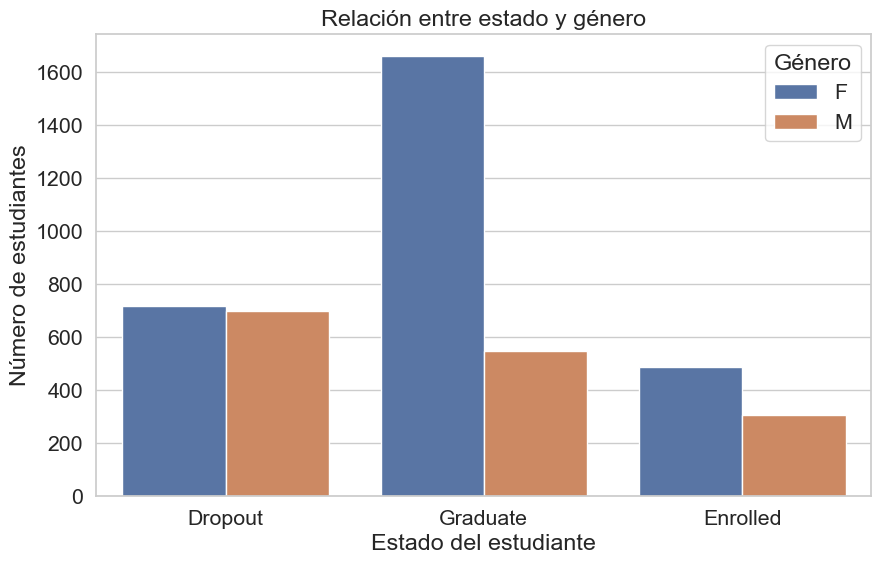

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Estado', hue='Gender', data=df)
plt.xlabel('Estado del estudiante')
plt.ylabel('Número de estudiantes')
plt.title('Relación entre estado y género')
plt.legend(title='Género', labels=['F', 'M'])
plt.show()

El número de mujeres que se gradúan (más de 1600) es casi el triple que el de los hombres, lo que demuestra un rendimiento y una tasa de finalización de estudios abrumadoramente superiores para el género femenino.
De manera interesante, el número de desertores es prácticamente el mismo para ambos géneros, a pesar de que hay muchas más mujeres en la población estudiantil total. Esto implica que, en términos relativos, la tasa de deserción es considerablemente mayor para los estudiantes masculinos.
Mientras que el abandono afecta a ambos géneros en números absolutos similares, el éxito académico, medido por la graduación, está fuertemente inclinado hacia las estudiantes femeninas.

## Variables asociadas con las notas del primer semestre

### Unidades curriculares 2do semestre (grado)
'Curricular units 2nd sem (grade)'

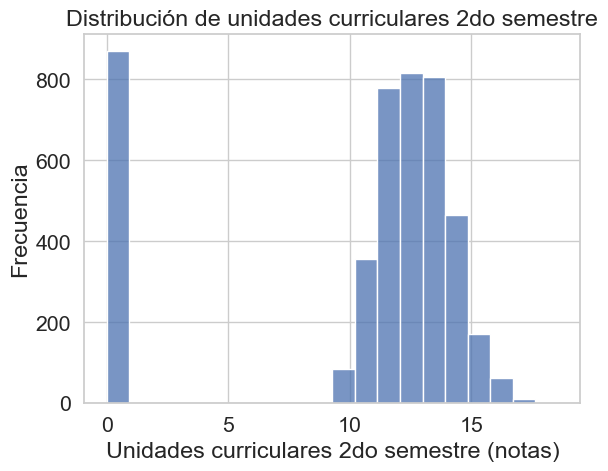

In [31]:
sns.histplot(df['Curricular units 2nd sem (grade)'], bins=20)
plt.xlabel('Unidades curriculares 2do semestre (notas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de unidades curriculares 2do semestre')
plt.show()


Un pico anómalo en cero identifica a una subpoblación inactiva, muy probablemente desertores, mientras que la distribución normal posterior representa a los estudiantes activos con una carga académica estándar.

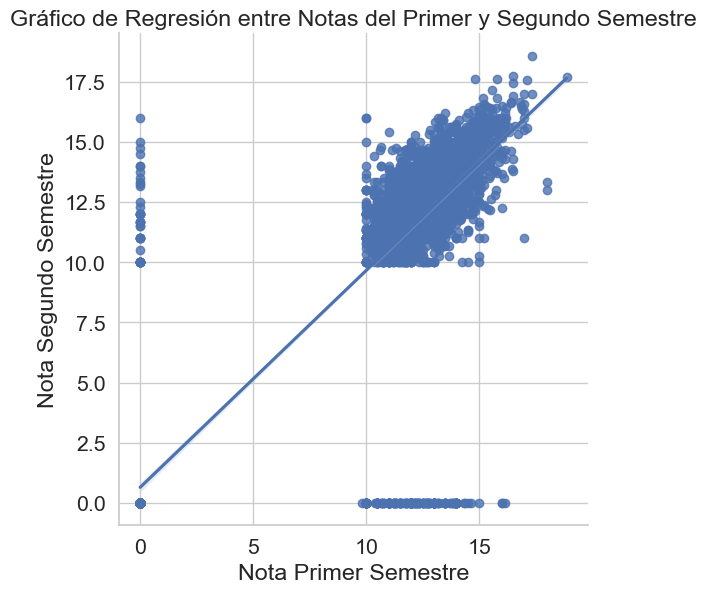

In [32]:
sns.lmplot(data=df, x='first_semester_grade', y='Curricular units 2nd sem (grade)', height=6)
plt.title('Gráfico de Regresión entre Notas del Primer y Segundo Semestre')
plt.xlabel('Nota Primer Semestre')
plt.ylabel('Nota Segundo Semestre')
plt.grid(True)
plt.show()

El gráfico muestra correlación positiva para el grupo principal de estudiantes, pero la gran cantidad de puntos en el valor 'cero' de ambos ejes distorsiona fuertemente la línea de regresión. Esto sugiere que el cero no es una calificación real, sino un valor que representa datos ausentes o abandonos

### Unidades curriculares 1er semestre (aprobadas)
'Curricular units 1st sem(approved)'

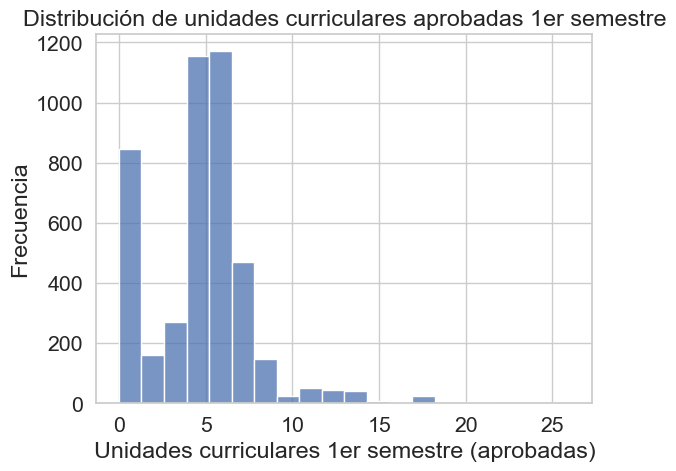

In [33]:
sns.histplot(df['Curricular units 1st sem (approved)'], bins=20)
plt.xlabel('Unidades curriculares 1er semestre (aprobadas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de unidades curriculares aprobadas 1er semestre')
plt.show()


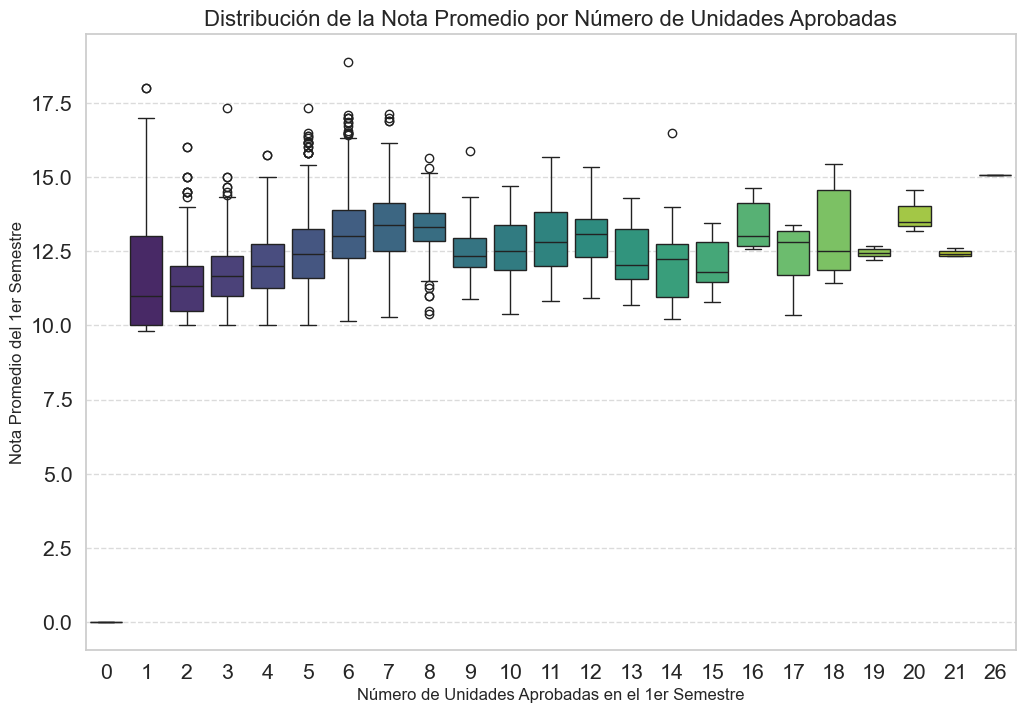

In [34]:
plt.figure(figsize=(12, 8))

# INVERTIMOS LAS VARIABLES EN LOS EJES X e Y
sns.boxplot(
    data=df,
    x='Curricular units 1st sem (approved)', # Variable discreta como categoría
    y='first_semester_grade',                # Variable continua para la distribución
    palette='viridis'
)

plt.title('Distribución de la Nota Promedio por Número de Unidades Aprobadas', fontsize=16)
plt.xlabel('Número de Unidades Aprobadas en el 1er Semestre', fontsize=12)
plt.ylabel('Nota Promedio del 1er Semestre', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

a medida que los estudiantes aprueban más unidades, su nota promedio tiende a ser más alta y consistente. Además, se observa una mayor dispersión de notas en quienes aprueban pocas materias, mientras que el rendimiento es más homogéneo y elevado en aquellos que superan una mayor cantidad de unidades.

### Unidades curriculares 2do semestre (aprobadas)
'Curricular units 2nd sem (approved)'

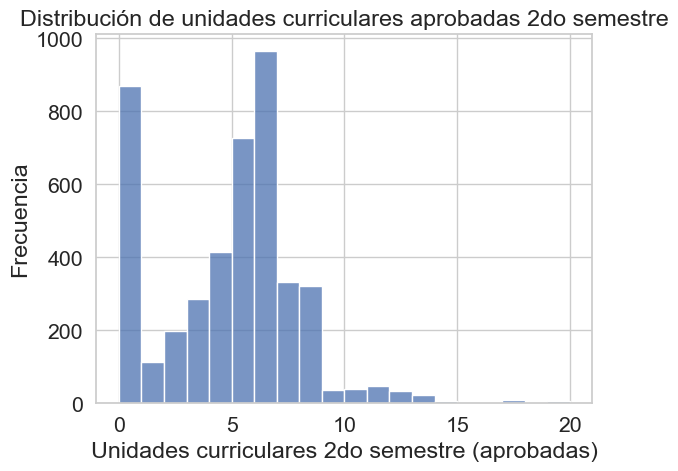

In [35]:
sns.histplot(df['Curricular units 2nd sem (approved)'], bins=20)
plt.xlabel('Unidades curriculares 2do semestre (aprobadas)')
plt.ylabel('Frecuencia')
plt.title('Distribución de unidades curriculares aprobadas 2do semestre')
plt.show()

El histograma revela una distribución bimodal de unidades curriculares aprobadas. Un gran número de estudiantes no aprobó ninguna unidad (valor 0, probable dropout). Un segundo pico significativo de aprobación se concentra entre 6 y 7 unidades. Muy pocos estudiantes aprueban más de 8 unidades, lo que sugiere un límite práctico en la carga académica exitosa.

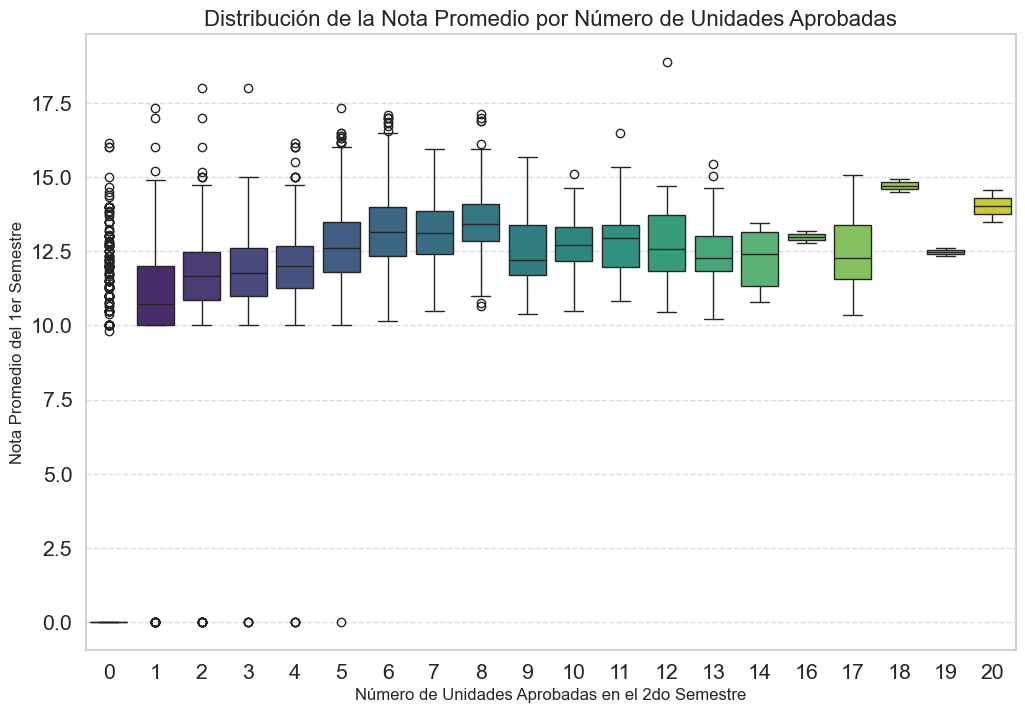

In [36]:
plt.figure(figsize=(12, 8))

# INVERTIMOS LAS VARIABLES EN LOS EJES X e Y
sns.boxplot(
    data=df,
    x='Curricular units 2nd sem (approved)', # Variable discreta como categoría
    y='first_semester_grade',                # Variable continua para la distribución
    palette='viridis'
)

plt.title('Distribución de la Nota Promedio por Número de Unidades Aprobadas', fontsize=16)
plt.xlabel('Número de Unidades Aprobadas en el 2do Semestre', fontsize=12)
plt.ylabel('Nota Promedio del 1er Semestre', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Se observa una clara tendencia ascendente: a mayor número de unidades aprobadas en el segundo semestre, más alta y consistente fue la nota promedio del primero. El grupo que no aprueba ninguna materia es el más variado, incluyendo tanto a estudiantes con buen rendimiento previo (posibles abandonos) como a aquellos con notas bajas.

### Unidades curriculares 1er semestre (Evaluaciones)
 'Curricular units 1st sem (Evaluations)'

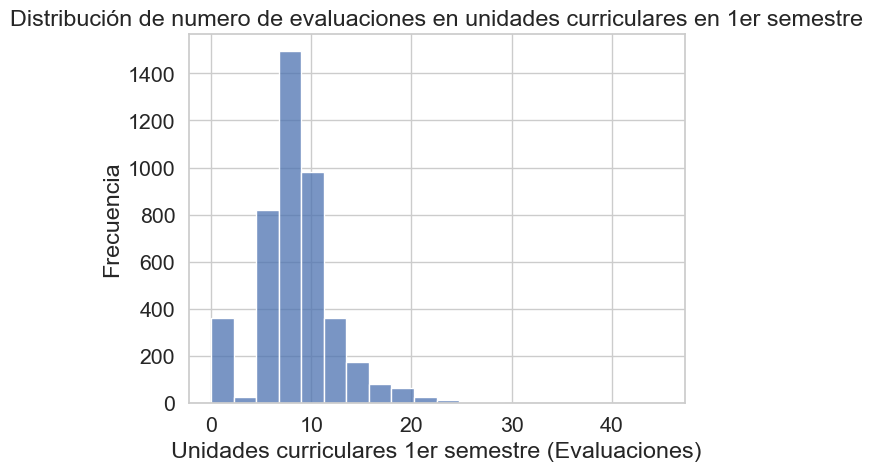

In [37]:
sns.histplot(df['Curricular units 1st sem (evaluations)'], bins=20)
plt.xlabel('Unidades curriculares 1er semestre (Evaluaciones)')
plt.ylabel('Frecuencia')
plt.title('Distribución de numero de evaluaciones en unidades curriculares en 1er semestre')
plt.show()

El histograma muestra que el número de evaluaciones por estudiante está concentrado principalmente entre 6 y 12, con la frecuencia más alta alrededor de 8-9 evaluaciones

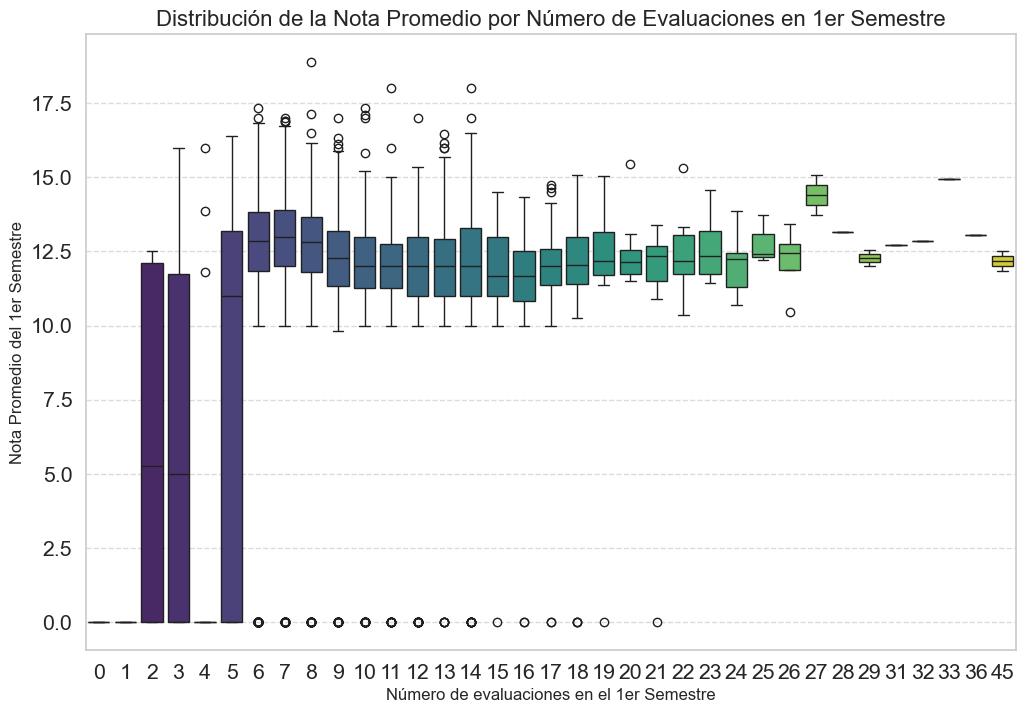

In [38]:
plt.figure(figsize=(12, 8))

# INVERTIMOS LAS VARIABLES EN LOS EJES X e Y
sns.boxplot(
    data=df,
    x='Curricular units 1st sem (evaluations)', # Variable discreta como categoría
    y='first_semester_grade',                # Variable continua para la distribución
    palette='viridis'
)

plt.title('Distribución de la Nota Promedio por Número de Evaluaciones en 1er Semestre', fontsize=16)
plt.xlabel('Número de evaluaciones en el 1er Semestre', fontsize=12)
plt.ylabel('Nota Promedio del 1er Semestre', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Los estudiantes con 5 o menos evaluaciones tienen un rendimiento bajo y muy variable. A partir de 6 evaluaciones, la nota promedio salta a un nivel consistentemente más alto (entre 12 y 13). La presencia de numerosos outliers con nota cero para este último grupo sugiere fuertemente que el valor '0' no es una calificación real, sino un código para abandono.

### Unidades curriculares 2do semestre (Matriculados)
'Curricular units 2nd sem (Enrolled)'

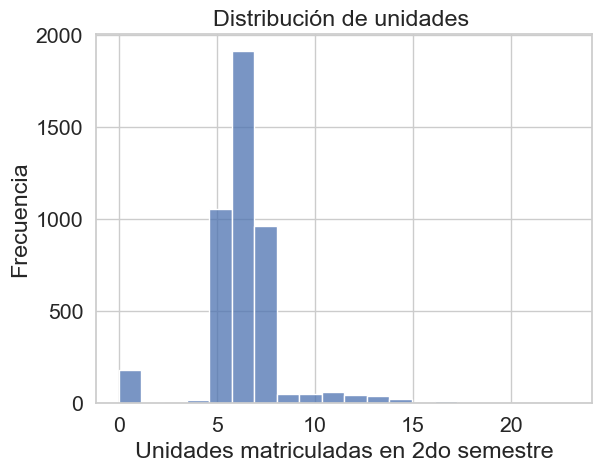

In [39]:
sns.histplot(df['Curricular units 2nd sem (enrolled)'], bins=20)
plt.xlabel('Unidades matriculadas en 2do semestre')
plt.ylabel('Frecuencia')
plt.title('Distribución de unidades ')
plt.show()

La carga académica del segundo semestre es muy homogénea, con una fuerte concentración de estudiantes matriculados en 6 unidades. La distribución está fuertemente sesgada a la derecha, mostrando que es muy raro que un estudiante se matricule en más de 8 unidades. El pequeño pico en 0 sugiere un grupo de estudiantes que no se reinscribió.

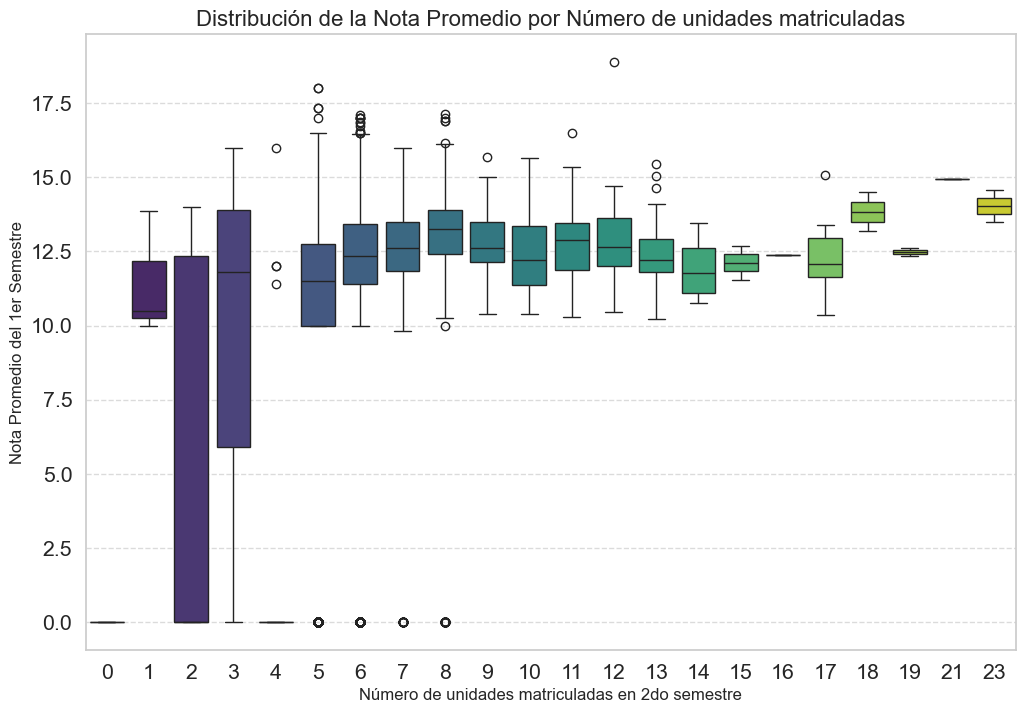

In [40]:
plt.figure(figsize=(12, 8))

# INVERTIMOS LAS VARIABLES EN LOS EJES X e Y
sns.boxplot(
    data=df,
    x='Curricular units 2nd sem (enrolled)', # Variable discreta como categoría
    y='first_semester_grade',                # Variable continua para la distribución
    palette='viridis'
)

plt.title('Distribución de la Nota Promedio por Número de unidades matriculadas', fontsize=16)
plt.xlabel('Número de unidades matriculadas en 2do semestre', fontsize=12)
plt.ylabel('Nota Promedio del 1er Semestre', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El gráfico muestra que los estudiantes que se matriculan en una carga académica estándar (5 o más unidades) en el segundo semestre tuvieron, en general, un buen y consistente rendimiento en el primero. En contraste, aquellos que se matriculan en muy pocas unidades (1-4) presentan una variabilidad de notas extremadamente alta.

# Preprocesamiento


# Division de datos

Dividimos los datos 30% test y 70% entrenamiento y proporcionamos el parametro __random_state = 42__ para replicabilidad

In [41]:
X= df.drop(columns=['Estado','GDP'])
Y_Estado=df['Estado']
Y_GDP=df['GDP']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_Estado, X_test_Estado, Y_train_Estado, Y_test_Estado = train_test_split(X, Y_Estado, test_size=0.3, random_state=42, stratify=Y_Estado)
X_train_GDP, X_test_GDP, Y_train_GDP, Y_test_GDP = train_test_split(X, Y_GDP, test_size=0.3, random_state=42)
print("Clasificación - Estado:")
print("Train:", X_train_Estado.shape, "Test:", X_test_Estado.shape)

print("\nRegresión - GDP:")
print("Train:", X_train_GDP.shape, "Test:", X_test_GDP.shape)

Clasificación - Estado:
Train: (3096, 35) Test: (1328, 35)

Regresión - GDP:
Train: (3096, 35) Test: (1328, 35)


Aqui podemos ver el tamaño de las muestras tanto de entreo como de prueba

# KNN Classifier

In [42]:
K_values= range(1,26)
puntaje_entreno_Estado=[]
puntaje_prueba_Estado=[]
for k in K_values:
    KNclas_model=KNeighborsClassifier(n_neighbors=k)
    KNclas_model.fit(X_train_Estado,Y_train_Estado)
    y_train_pred = KNclas_model.predict(X_train_Estado)
    y_test_pred = KNclas_model.predict(X_test_Estado)
    puntaje_entreno_Estado.append(balanced_accuracy_score(Y_train_Estado, y_train_pred))
    puntaje_prueba_Estado.append(balanced_accuracy_score(Y_test_Estado, y_test_pred))
    

Para el modelo deee **Clasificación** decidimos usar la metrica de **Balanced Accuracy** debido aque la variable respuesta __Estado__ presenta un desbalance en sus clases

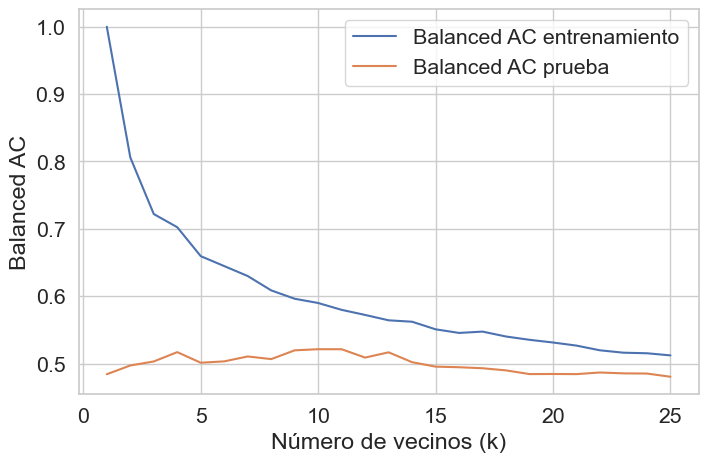

In [43]:

plt.figure(figsize=(8,5))
plt.plot(K_values, puntaje_entreno_Estado, label="Balanced AC entrenamiento")
plt.plot(K_values, puntaje_prueba_Estado, label="Balanced AC prueba")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Balanced AC")
plt.legend()
plt.show()

Luego de calcular el __Balanced Acurracy score__ para distintos valores de k tomamos el mejor puntaje del teste y nos quedamos con el K que lo obtuvo.
Para este caso decidimos usar además la metrica **f1_score** con el parametro **average='macro'** debido a que consideramos que por el desbalance entre clases que presenta la variable lo mejor seria darle el mismo valor a todas las clases.
Además de generar una matriz de confusión, calcular el ROC (para cada clase) y  el AUC de manera que tengamos una vista más completa del desempeño del modelo.

Mejor k: 10
Balanced Accuracy: 0.5214010782959674
F1-score (macro): 0.5241691496130451


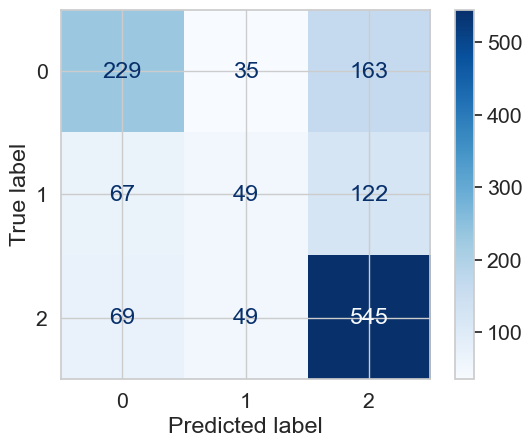

ROC AUC (macro): 0.7160882671315494


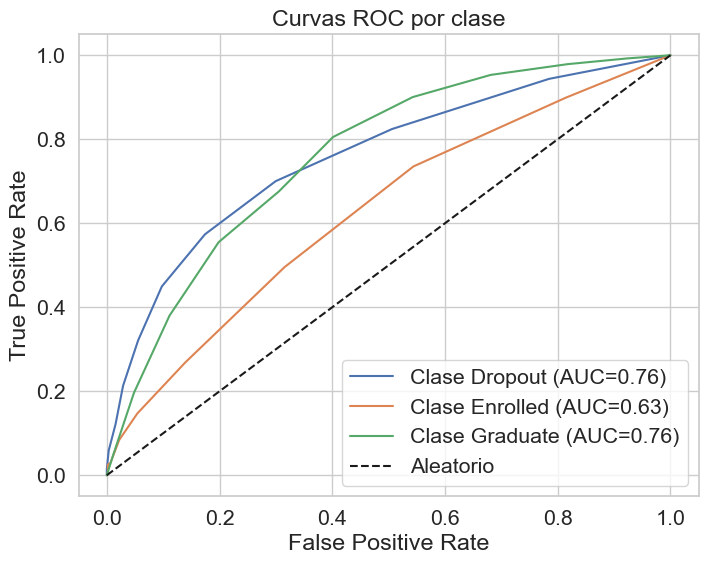

In [44]:
best_k = K_values[puntaje_prueba_Estado.index(max(puntaje_prueba_Estado))]
print(f"Mejor k: {best_k}")

KNclas_model = KNeighborsClassifier(n_neighbors=best_k)
KNclas_model.fit(X_train_Estado, Y_train_Estado)
y_pred = KNclas_model.predict(X_test_Estado)

# Métricas

print("Balanced Accuracy:", balanced_accuracy_score(Y_test_Estado, y_pred))
print("F1-score (macro):", f1_score(Y_test_Estado, y_pred, average='macro'))

cm = confusion_matrix(Y_test_Estado, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

clases = np.unique(Y_Estado)
y_test_bin = label_binarize(Y_test_Estado, classes=clases)
y_score = KNclas_model.predict_proba(X_test_Estado)  # Probabilidades

# Calcular ROC AUC macro
roc_auc_macro = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print("ROC AUC (macro):", roc_auc_macro)

# Dibujar curva ROC para cada clase
plt.figure(figsize=(8,6))
for i, clase in enumerate(clases):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Clase {clase} (AUC={auc_score:.2f})")

# Línea aleatoria
plt.plot([0,1], [0,1], 'k--', label='Aleatorio')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC por clase')
plt.legend()
plt.show()

# KNN Regresion

# Comparación de distintos valores de k

# Documentación y conclusiones